__Note:__ This is a reduced version of [this](https://youtu.be/MKucn8NtVeI) tutorial. You can find the entire material [here](https://github.com/WeatherGod/AnatomyOfMatplotlib).

# Matplotlib
## Introduction
Matplotlib is a library for producing publication-quality figures.


## Online Documentation
The [matplotlib.org](http://matplotlib.org) project website is the primary online resource for the library's documentation. It contains [examples](http://matplotlib.org/examples/index.html), [FAQs](http://matplotlib.org/faq/index.html), [API documentation](http://matplotlib.org/api/index.html), and, most importantly, the [gallery](http://matplotlib.org/gallery.html).

## Anatomy of a "Plot"

People use "plot" to mean many different things.  Here, we'll be using a consistent terminology (mirrored by the names of the underlying classes, etc):


<img src="images/figure_axes_axis_labeled.png">

The ``Figure`` is the top-level container in this hierarchy.  It is the overall window/page that everything is drawn on.  You can have multiple independent figures and ``Figure``s can contain multiple ``Axes``. 

Most plotting ocurs on an ``Axes``.  The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it.  Usually we'll set up an Axes with a call to ``subplot`` (which places Axes on a regular grid), so in most cases, ``Axes`` and ``Subplot`` are synonymous.

Each ``Axes`` has an ``XAxis`` and a ``YAxis``.  These contain the ticks, tick locations, labels, etc..

### Getting Started

We'll use the following import statements. These abbreviations are semi-standardized, and most tutorials, other scientific python code, etc that you'll find elsewhere will use them as well.

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Figures

Now let's create a figure...

In [2]:
fig = plt.figure()

Nothing happened! This is because by default mpl will not show anything until told to do so.

# Axes

All plotting is done with respect to an [`Axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). An *Axes* is made up of [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects and many other things. An *Axes* object must belong to a *Figure* (and only one *Figure*). Most commands you will ever issue will be with respect to this *Axes* object.

Typically, you'll set up a `Figure`, and then add an `Axes` to it. 

You can use `fig.add_axes`, but in most cases, you'll find that adding a subplot will fit your needs perfectly.

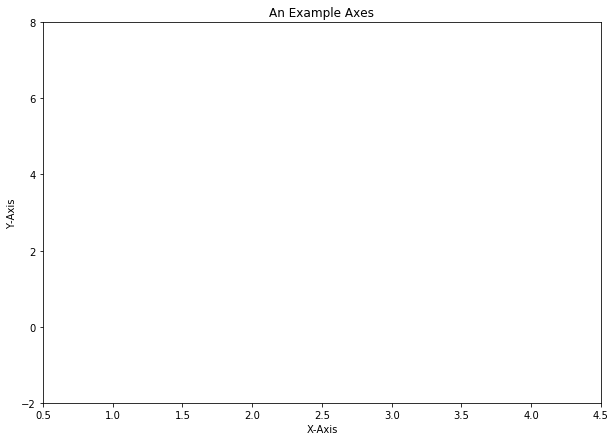

In [9]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111) # I'll explain the "111" later. Basically, 1 row and 1 column.
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes', ylabel='Y-Axis', xlabel='X-Axis')
plt.show()


Notice the call to ``set``. Matplotlib's objects typically have lots of "explicit setters" -- in other words, functions that start with ``set_<something>`` and control a particular option. 

In [ ]:
ax.set<TAB>

For example, we could have written the third line above as:

In [ ]:
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title('An Example Axes')
ax.set_ylabel('Y-Axis')
ax.set_xlabel('X-Axis')

### Basic Plotting

Most plotting happens on an `Axes`.  Therefore, if you're plotting something on an axes, then you'll use one of its methods.

There are several plotting methods. For now, let's focus on two methods: `plot` and `scatter`.

`plot` draws points with lines connecting them.  `scatter` draws unconnected points, optionally scaled or colored by additional variables.

As a basic example:

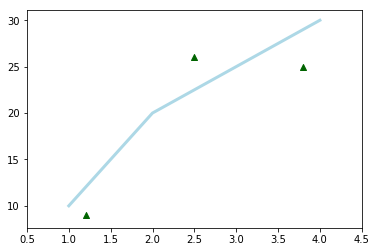

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

### Axes methods vs. pyplot

Interestingly, just about all methods of an *Axes* object exist as a function in the *pyplot* module (and vice-versa). For example, when calling `plt.xlim(1, 10)`, *pyplot* calls `ax.set_xlim(1, 10)` on whichever *Axes* is "current". Here is an equivalent version of the above example using just pyplot.

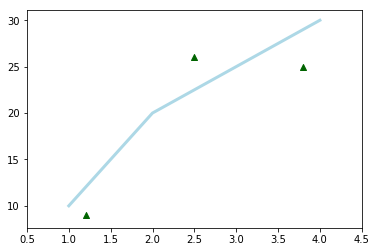

In [14]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 4.5)
plt.show()

Much cleaner, and much clearer! So, why will most of my examples not follow the pyplot approach? Because [PEP20](http://www.python.org/dev/peps/pep-0020/) "The Zen of Python" says:

"Explicit is better than implicit"

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


While very simple plots, with short scripts would benefit from the conciseness of the pyplot implicit approach, when doing more complicated plots, or working within larger scripts, you will want to explicitly pass around the *Axes* and/or *Figure* object to operate upon.

The advantage of keeping which axes we're working with very clear in our code will become more obvious when we start to have multiple axes in one figure.

### Multiple Axes

It was mentioned before that a figure can have more than one `Axes` on it. If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

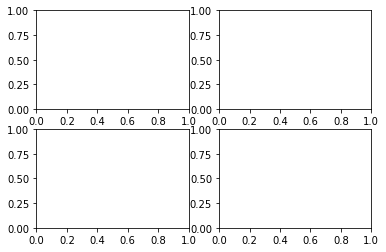

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.show()

`plt.subplots(...)` created a new figure and added 4 subplots to it.  The `axes` object that was returned is a 2D numpy object array.  Each item in the array is one of the subplots.  They're laid out as you see them on the figure.  

Therefore, when we want to work with one of these axes, we can index the `axes` array and use that item's methods.

For example:

In [8]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0d9e26fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe0d76a03c8>]], dtype=object)

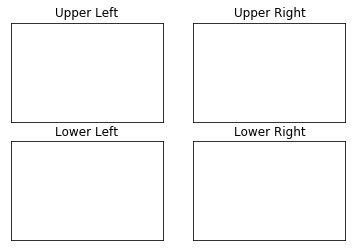

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

for ax in axes.ravel():
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()

One really nice thing about `plt.subplots()` is that when it's called with no arguments, it creates a new figure with a single subplot. 

Any time you see something like

```
fig = plt.figure()
ax = fig.add_subplot(111)
```

You can replace it with:

```
fig, ax = plt.subplots()
```

# Visual Overview of Plotting Functions

Matplotlib has a number of different plotting functions, in fact, many more than we'll cover here. There's a more complete list in the pyplot documentation, and matplotlib gallery is a great place to get examples of all of them.  

However, a full list and/or the gallery can be a bit overwhelming at first. Instead we'll condense it down and give you a look at some of the ones you're most likely to use, and then go over a subset of those in more detail.

Here's a simplified visual overview of matplotlib's most commonly used plot types.

## The Basics: 1D series/points
### What we've mentioned so far
<img src="images/plot_example.png">
<img src="images/scatter_example.png">
### Other common plot types
<img src="images/bar_example.png">
<img src="images/fill_example.png">

## 2D Arrays and Images
<img src="images/imshow_example.png">
<img src="images/contour_example.png">

## Vector Fields
<img src="images/vector_example.png">

## Data Distributions
<img src="images/statistical_example.png">

# Some Detailed Examples

In [15]:
# Let's get our standard imports out of the way
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Barplots
Bar plots are one of the most common plot types.  Matplotlib's `ax.bar(...)` is optimized for a simple sequence of x, y values, where the rectangles have a constant width.  There's also `ax.barh(...)` (for horizontal), which makes a constant-height assumption instead of a constant-width assumption.

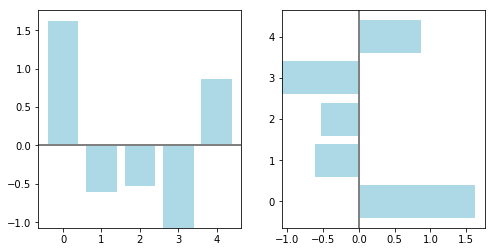

In [22]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)

fig, axes = plt.subplots(ncols=2, figsize=plt.figaspect(1./2))

vert_bars = axes[0].bar(x, y, color='lightblue', align='center')
horiz_bars = axes[1].barh(x, y, color='lightblue', align='center')

# I'll also introduce axhline & axvline to draw a line all the way across the axes
# This can be a quick-n-easy way to draw an axis "spine".
axes[0].axhline(0, color='gray', linewidth=2)
axes[1].axvline(0, color='gray', linewidth=2)

plt.show()

### Filled Regions: `ax.fill(x, y)`, `fill_between(...)`, etc
<img src="images/fill_example.png">

Of these functions, `ax.fill_between(...)` is probably the one you'll use the most often.  In its most basic form, it fills between the given y-values and 0:

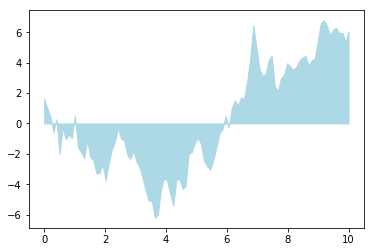

In [34]:
np.random.seed(1)
y = np.random.randn(100).cumsum()
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
ax.fill_between(x, y, color='lightblue')
plt.show()